<a href="https://colab.research.google.com/github/douyang/echonet-function-evaluation/blob/master/Calculations_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generating Image Samples

In [1]:
from google.colab.patches import cv2_imshow
import os
import cv2
import numpy as np

In [2]:
path = "/content/0X100E3B8D3280BEC5.avi_38.png"

#Get all of the coordinates of the edge of the segmented mask(Red Version)

In [3]:
# # read image
# img = cv2.imread(path)
# rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# # set lower and upper bounds on blue color
# lower = (100,0,0)
# upper = (255,0,0)

# # threshold and invert so hexagon is white on black background
# thresh = cv2.inRange(rgb, lower, upper)

# # get contours
# result = np.zeros_like(thresh)
# contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# contours = contours[0] if len(contours) == 2 else contours[1]

# points = []
# # list contour points
# for pt in contours:
#     for i in pt:
#       for coord in i:
#         points.append(coord.tolist())
# print(points)

# print("Number of points: ", len(points))
# # show thresh and contour  
# cv2_imshow(thresh)
# cv2_imshow(img)

# cv2.waitKey(0)
# cv2.destroyAllWindows()


# Blue Version

In [4]:
# # read image
# img = cv2.imread(path)
# rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# # set lower and upper bounds on blue color
# lower = (0,0,100)
# upper = (255,255,255)

# # threshold and invert so hexagon is white on black background
# thresh = cv2.inRange(rgb, lower, upper)


# # get contours
# result = np.zeros_like(thresh)
# contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# contours = contours[0] if len(contours) == 2 else contours[1]

# points = []
# # list contour points
# for pt in contours:
#     for i in pt:
#       for coord in i:
#         points.append(coord.tolist())
# print(points)

# print("Number of points: ", len(points))
# # show thresh and contour  
# cv2_imshow(thresh)
# cv2_imshow(img)
# # cv2_imshow(opening)
# # cv2_imshow(closing)

# cv2.waitKey(0)
# cv2.destroyAllWindows()


# Mask from binary mask

[[57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 71], [65, 71], [66, 71], [67, 71], [68, 71], [69, 71], [70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66], [80, 65], [80, 64], [80, 63], [80, 62], [80, 61], [80, 60], [80, 59], [79, 58], [79, 57], [79, 56], [79, 55], [79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33],

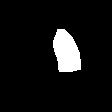

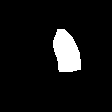

In [5]:
# read image
img = cv2.imread(path)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# set lower and upper bounds on blue color
lower = (200,200,200)
upper = (255,255,255)

# threshold and invert so hexagon is white on black background
thresh = cv2.inRange(rgb, lower, upper)

# get contours
result = np.zeros_like(thresh)
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours = contours[0] if len(contours) == 2 else contours[1]

points = []
# list contour points
for pt in contours:
    for i in pt:
      for coord in i:
        points.append(coord.tolist())
print(points)

print("Number of points: ", len(points))
# show thresh and contour  
cv2_imshow(img)
cv2_imshow(thresh)

# cv2_imshow(opening)
# cv2_imshow(closing)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [6]:
pointGroups = []
index = 0
subgroup = [points[0]]

for i in range(len(points) - 1):
  prevPoint = points[i]
  currentPoint = points[i+1]

  if abs(prevPoint[0]-currentPoint[0]) <= 1 and abs(prevPoint[1]-currentPoint[1]) <= 1:
    subgroup.append(currentPoint)
  else:
    pointGroups.append(subgroup[:])
    subgroup = [currentPoint]

pointGroups.append(subgroup)

mainPointGroup = []
maxPointGroupSize = 0

for group in pointGroups:
  if len(group) > maxPointGroupSize:
    maxPointGroup = group
    maxPointGroupSize = len(group)

points = maxPointGroup[:]

# Top 5 and Bottom 5 Analysis(Heuristic 2)


In [7]:
def getDistance(point1, point2):
  return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def getSlope(point1, point2):
  if ((point1[0] == point2[0])):
    return -333
  return (point1[1] - point2[1])/(point1[0] - point2[0])

# Minimum and Maximum Y Coord
maxY = max(points, key = lambda point: point[1])
minY = min(points, key = lambda point: point[1])

# MinY and MaxY With the limits
minYWith5 = minY[1] + 5
maxYWithout5 = maxY[1] - 15

# Creating these arrays
minYWith5Arr = []
maxYWithout5Arr = []

# Finding these points
for point in points:
  if point[1] == minYWith5:
    minYWith5Arr.append(point)
  if point[1] == maxYWithout5:
    maxYWithout5Arr.append(point)

# Average X Coordinates
averageTopX = round((minYWith5Arr[0][0] + minYWith5Arr[-1][0])/2)
averageBottomX = round((maxYWithout5Arr[0][0] + maxYWithout5Arr[-1][0])/2)
slope = getSlope([averageTopX, minYWith5], [averageBottomX, maxYWithout5])

if slope > 0:
  averageTopX -= round((minYWith5Arr[-1][0] - minYWith5Arr[0][0])/1.5/slope)
  averageBottomX += round((maxYWithout5Arr[-1][0] - maxYWithout5Arr[0][0])/3/slope)
else:
  averageTopX -= round((minYWith5Arr[-1][0] - minYWith5Arr[0][0])/1.5/slope)
  averageBottomX += round((maxYWithout5Arr[-1][0] - maxYWithout5Arr[0][0])/3/slope)


# Creating these arrays
averageTopXArr = []
averageBottomXArr = []

# Finding these points
condition = True
if slope > 0:
  while condition and averageTopX <= minYWith5Arr[-1][0] and averageBottomX >= maxYWithout5Arr[0][0]:
    for point in points:
      if point[0] == averageTopX:
        averageTopXArr.append(point)
      if point[0] == averageBottomX:
        averageBottomXArr.append(point)
    if len(averageTopXArr) > 0 and len(averageBottomXArr):
      condition = False
    if len(averageTopXArr) == 0:
      averageTopX += 1
    if len(averageBottomXArr) == 0:
      averageBottomXArr -= 1
else:
  while condition and averageTopX >= minYWith5Arr[0][0] and averageBottomX <= maxYWithout5Arr[-1][0]:
    for point in points:
      if point[0] == averageTopX:
        averageTopXArr.append(point)
      if point[0] == averageBottomX:
        averageBottomXArr.append(point)
    if len(averageTopXArr) > 0 and len(averageBottomXArr):
      condition = False
    if len(averageTopXArr) == 0:
      averageTopX -= 1
    if len(averageBottomXArr) == 0:
      averageBottomXArr += 1

# Sorting Arrs
averageTopXArr.sort(key=lambda point: point[1])
averageBottomXArr.sort(key=lambda point: point[1])
averageBottomXArr.reverse()


# Finding Min Top and Max Bottom
TopCoord = averageTopXArr[0]
BottomCoord = averageBottomXArr[0]

x1, y1 = TopCoord
x2, y2 = BottomCoord

if (x1 + y1) > (x2 + y2):
  x1, y1, x2, y2 = x2, y2, x1, y1

print(x1, y1, x2, y2)

60 29 70 71


# Calculate Weighted Average

In [8]:
import math

# parallel_dist = distance/21

weighted_avg = []

for n in range(1, 21, 1):
  x_perpendicular = (((n*x1)+(21-n)*(x2))/21)
  y_perpendicular = (((n*y1)+(21-n)*(y2))/21)
  weighted_avg.append([x_perpendicular, y_perpendicular])

print(weighted_avg)

[[69.52380952380952, 69.0], [69.04761904761905, 67.0], [68.57142857142857, 65.0], [68.0952380952381, 63.0], [67.61904761904762, 61.0], [67.14285714285714, 59.0], [66.66666666666667, 57.0], [66.19047619047619, 55.0], [65.71428571428571, 53.0], [65.23809523809524, 51.0], [64.76190476190476, 49.0], [64.28571428571429, 47.0], [63.80952380952381, 45.0], [63.333333333333336, 43.0], [62.857142857142854, 41.0], [62.38095238095238, 39.0], [61.904761904761905, 37.0], [61.42857142857143, 35.0], [60.95238095238095, 33.0], [60.476190476190474, 31.0]]


# Find All Mask White points

In [9]:
p1Index = points.index([x1, y1])
p2Index = points.index([x2, y2])

lowerIndex = min(p1Index, p2Index)
higherIndex = max(p1Index, p2Index)

higherIntercept = points[lowerIndex:higherIndex]
lowerIntercept = points[higherIndex:] + points[:lowerIndex]

if (higherIntercept[0][0] + higherIntercept[0][1]) > (lowerIntercept[0][0] + lowerIntercept[0][1]):
  lowerIntercept, higherIntercept = higherIntercept, lowerIntercept

print(lowerIntercept)
print(higherIntercept)

[[70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66], [80, 65], [80, 64], [80, 63], [80, 62], [80, 61], [80, 60], [80, 59], [79, 58], [79, 57], [79, 56], [79, 55], [79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29]]
[[60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71]

In [10]:
def findCorrespondingMaskPoints(weighted_avg, lowerIntercept, higherIntercept, x1, y1, x2, y2, slope, i):
  # Calculate perpendicular slope
  try:
    perp_slope = -1/slope
  except:
    perp_slope = 10000

  # Indexing
  lowerIndex = 0
  higherIndex = 0

  # Make sure its from top to bottom direction
  if (weighted_avg[-1][0] + weighted_avg[-1][1]) < (weighted_avg[0][0] + weighted_avg[0][1]):
    weighted_avg = weighted_avg[::-1]

  # Make sure its from top to bottom direction
  if getDistance(weighted_avg[0], higherIntercept[0]) > getDistance(weighted_avg[0], higherIntercept[-1]):
      higherIntercept = higherIntercept[::-1]

  # Make sure its from top to bottom direction
  if getDistance(weighted_avg[0], lowerIntercept[0]) > getDistance(weighted_avg[0], lowerIntercept[-1]):
      lowerIntercept = lowerIntercept[::-1]

  higherInterceptAveragePoints = []
  lowerInterceptAveragePoints = []

  for averagePoint in weighted_avg:
    try:
      condition = True
      count = 0
      while condition:
        point = higherIntercept[higherIndex]
        if higherIndex == 0:
          prev_point =  [x1, y1] if getDistance(point, [x1, y1]) < getDistance(point, [x2, y2]) else [x2, y2]
          start_point = prev_point[:]
        elif higherIndex == 1:
          prev_point = higherIntercept[higherIndex-1]
        else:
          prev_point = higherIntercept[higherIndex-2]
        
        new_slope = getSlope(point, averagePoint)
        prev_slope =  getSlope(prev_point, averagePoint)
        betweenCond = ((point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0])) and abs(new_slope) > abs(slope) and abs(prev_slope) > abs(slope)
        slopeCond = (new_slope >= perp_slope and prev_slope<=perp_slope) or  (new_slope <= perp_slope and prev_slope>=perp_slope)

        if slopeCond and not betweenCond:
          higherInterceptAveragePoints.append(point)
          condition = False
        elif abs(perp_slope) >= 10 and ((new_slope > 0 and prev_slope < 0) or (new_slope < 0 and prev_slope > 0)):
          higherInterceptAveragePoints.append(point)
          condition = False
        elif count > len(higherIntercept)/2:
          higherIndex -= count
          if higherIndex == 0:
            higherInterceptAveragePoints.append(start_point)
          else:
            higherInterceptAveragePoints.append(higherIntercept[higherIndex])
          condition = False
        
        count += 1
        higherIndex += 1
    except:
      higherInterceptAveragePoints.append(higherIntercept[higherIndex - 1])

  for averagePoint in weighted_avg:
    try:
      condition = True
      count = 0
      while condition:
        point = lowerIntercept[lowerIndex]
        if lowerIndex == 0:
          prev_point = [x1, y1] if getDistance(point, [x1, y1]) < getDistance(point, [x2, y2]) else [x2, y2]
          start_point = prev_point[:]
        elif lowerIndex == 1:
          prev_point  = lowerIntercept[lowerIndex-1]
        else:
          prev_point = lowerIntercept[lowerIndex-2]

        new_slope = getSlope(point, averagePoint)
        prev_slope =  getSlope(prev_point, averagePoint)
        betweenCond = ((point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0])) and abs(new_slope) > abs(slope) and abs(prev_slope) > abs(slope)
        slopeCond = (new_slope >= perp_slope and prev_slope<=perp_slope) or  (new_slope <= perp_slope and prev_slope>=perp_slope)

        print( slopeCond and not betweenCond, point, prev_point, averagePoint, new_slope, prev_slope, perp_slope)

# True [73, 70] [72, 71] [66.0001, 52.666666666666664] 2.47622585084549 3.0556064823302633 3.0
# False [74, 70] [73, 70] [67.0001, 52.333333333333336] 2.523845578746364 2.9444935193364348 3.0
# False [75, 70] [74, 70] [67.0001, 52.333333333333336] 2.208360937845057 2.523845578746364 3.0
# False [76, 70] [75, 70] [67.0001, 52.333333333333336] 1.9629847739048958 2.208360937845057 3.0
# False [77, 69] [76, 70] [67.0001, 52.333333333333336] 1.666683333500002 1.9629847739048958 3.0
# False [78, 69] [77, 69] [67.0001, 52.333333333333336] 1.515165289381419 1.666683333500002 3.0
# False [79, 69] [78, 69] [67.0001, 52.333333333333336] 1.3889004630594146 1.515165289381419 3.0
# False [80, 69] [79, 69] [67.0001, 52.333333333333336] 1.2820611440600826 1.3889004630594146 3.0
# False [80, 68] [80, 69] [67.0001, 52.333333333333336] 1.2051374754164776 1.2820611440600826 3.0
# False [80, 67] [80, 68] [67.0001, 52.333333333333336] 1.1282138067728726 1.2051374754164776 3.0
# False [80, 66] [80, 67] [67.0001, 52.333333333333336] 1.0512901381292676 1.1282138067728726 3.0
# False [80, 65] [80, 66] [67.0001, 52.333333333333336] 0.9743664694856627 1.0512901381292676 3.0
# False [80, 64] [80, 65] [67.0001, 52.333333333333336] 0.8974428008420579 0.9743664694856627 3.0
# False [80, 63] [80, 64] [67.0001, 52.333333333333336] 0.8205191321984528 0.8974428008420579 3.0
# False [80, 62] [80, 63] [67.0001, 52.333333333333336] 0.7435954635548478 0.8205191321984528 3.0
# False [80, 61] [80, 62] [67.0001, 52.333333333333336] 0.6666717949112428 0.7435954635548478 3.0
# False [80, 60] [80, 61] [67.0001, 52.333333333333336] 0.589748126267638 0.6666717949112428 3.0

        if slopeCond and not betweenCond:
          lowerInterceptAveragePoints.append(point)
          condition = False
        elif abs(perp_slope) > 10 and ((new_slope > 0 and prev_slope < 0) or (new_slope < 0 and prev_slope > 0)):
          lowerInterceptAveragePoints.append(point)
          condition = False
        elif count > len(lowerIntercept)/2:
          lowerIndex -= count
          if lowerIndex == 0:
            lowerInterceptAveragePoints.append(start_point)
          else:
            lowerInterceptAveragePoints.append(lowerIntercept[lowerIndex])
          condition = False
        
        count += 1
        lowerIndex += 1
    except:
      lowerInterceptAveragePoints.append(lowerIntercept[lowerIndex - 1])
  
  if i == 30:
      print(higherIntercept)
      print(lowerIntercept)
      print(weighted_avg)
      print(lowerInterceptAveragePoints)
      print(higherInterceptAveragePoints)
  return (lowerInterceptAveragePoints, higherInterceptAveragePoints)

 

# Create the 20 equally spaced points
def getWeightedAveragePoints(x1, y1, x2, y2, number):
  weighted_avg = []

  for n in range(1, number+1, 1):
    x_perpendicular = (((n*x1)+(number+1-n)*(x2))/(number+1))
    y_perpendicular = (((n*y1)+(number+1-n)*(y2))/(number+1))
    weighted_avg.append([x_perpendicular, y_perpendicular])

  for pair in weighted_avg:
    x, y = pair
    if x == int(x):
      pair[0] += 0.0001
    if y == int(y):
      pair[1] += 0.0001

  return weighted_avg

In [11]:
i = 30

x1, y1 = lowerIntercept[i]
x2, y2 = higherIntercept[i]

slope = getSlope([x1, y1], [x2, y2])

p1Index = points.index([x1, y1])
p2Index = points.index([x2, y2])

lowerIndex = min(p1Index, p2Index)
higherIndex = max(p1Index, p2Index)

higherInterceptPoints = points[lowerIndex:higherIndex]
lowerInterceptPoints = points[higherIndex:] + points[:lowerIndex]

if (higherInterceptPoints[0][0] + higherInterceptPoints[0][1]) < (lowerInterceptPoints[0][0] + lowerInterceptPoints[0][1]):
  lowerInterceptPoints, higherInterceptPoints = higherInterceptPoints, lowerInterceptPoints

weighted_avg = getWeightedAveragePoints(x1, y1, x2, y2, 20)
lowerInterceptAveragePoints, higherInterceptAveragePoints = findCorrespondingMaskPoints(weighted_avg, lowerInterceptPoints, higherInterceptPoints, x1, y1, x2, y2, slope, i)

False [56, 56] [56, 56] [57.0001, 55.666666666666664] -0.3333000033330013 -0.3333000033330013 3.0
False [57, 57] [56, 56] [57.0001, 55.666666666666664] -13333.333332890736 -0.3333000033330013 3.0
False [57, 58] [56, 56] [57.0001, 55.666666666666664] -23333.33333255877 -0.3333000033330013 3.0
False [57, 59] [57, 57] [57.0001, 55.666666666666664] -33333.33333222681 -13333.333332890736 3.0
False [57, 60] [57, 58] [57.0001, 55.666666666666664] -43333.33333189484 -23333.33333255877 3.0
False [58, 61] [57, 59] [57.0001, 55.666666666666664] 5.333866720005354 -33333.33333222681 3.0
False [58, 62] [57, 60] [57.0001, 55.666666666666664] 6.333966730006358 -43333.33333189484 3.0
False [58, 63] [58, 61] [57.0001, 55.666666666666664] 7.334066740007361 5.333866720005354 3.0
False [58, 64] [58, 62] [57.0001, 55.666666666666664] 8.334166750008364 6.333966730006358 3.0
False [58, 65] [58, 63] [57.0001, 55.666666666666664] 9.334266760009367 7.334066740007361 3.0
False [58, 66] [58, 64] [57.0001, 55.66666

77 49
56 56
[[57.0001, 55.666666666666664], [58.0001, 55.333333333333336], [59.0001, 55.0001], [60.0001, 54.666666666666664], [61.0001, 54.333333333333336], [62.0001, 54.0001], [63.0001, 53.666666666666664], [64.0001, 53.333333333333336], [65.0001, 53.0001], [66.0001, 52.666666666666664], [67.0001, 52.333333333333336], [68.0001, 52.0001], [69.0001, 51.666666666666664], [70.0001, 51.333333333333336], [71.0001, 51.0001], [72.0001, 50.666666666666664], [73.0001, 50.333333333333336], [74.0001, 50.0001], [75.0001, 49.666666666666664], [76.0001, 49.333333333333336]]


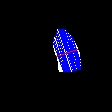

In [12]:
image = cv2.imread(path) 

height = image.shape[0]
width = image.shape[1]


# for point in weighted_avg:
#   cv2.circle(image,(int(point[0]), int(point[1])), 1, (0,255,0), -1)
  # if point[0] <50:
  #   print(point)

print(x1, y1)
print(x2, y2)
print(weighted_avg)
for i in range(len(lowerInterceptAveragePoints)): 
  # cv2.circle(image,tuple(lowerInterceptAveragePoints[i]), 1, (0,255,0), -1)
  cv2.line(image, tuple(lowerInterceptAveragePoints[i]), tuple(higherInterceptAveragePoints[i]), (255,0,0), 1)
cv2.line(image, (x1, y1), (x2, y2), (0,0,255), 1)

cv2_imshow(image)


# print(lowerInterceptAveragePoints)
# print(higherInterceptAveragePoints)
# print([x1, y1])
# print([x2, y2])

cv2.waitKey(0)
cv2.destroyAllWindows()

# Split points into 2

In [13]:
# def findCorrespondingMaskPoints(weighted_avg, lowerIntercept, higherIntercept, x1, y1, x2, y2, slope, i):
#   # Calculate perpendicular slope
#   try:
#     perp_slope = -1/slope
#   except:
#     perp_slope = 10000

#   # Indexing
#   lowerIndex = 0
#   higherIndex = 0

#   # Make sure its from top to bottom direction
#   if (weighted_avg[-1][0] + weighted_avg[-1][1]) < (weighted_avg[0][0] + weighted_avg[0][1]):
#     weighted_avg = weighted_avg[::-1]

#   # Make sure its from top to bottom direction
#   if getDistance(weighted_avg[0], higherIntercept[0]) > getDistance(weighted_avg[0], higherIntercept[-1]):
#       higherIntercept = higherIntercept[::-1]

#   # Make sure its from top to bottom direction
#   if getDistance(weighted_avg[0], lowerIntercept[0]) > getDistance(weighted_avg[0], lowerIntercept[-1]):
#       lowerIntercept = lowerIntercept[::-1]

#   higherInterceptAveragePoints = []
#   lowerInterceptAveragePoints = []

#   for averagePoint in weighted_avg:
#     try:
#       condition = True
#       count = 0
#       while condition:
#         point = higherIntercept[higherIndex]
#         if higherIndex == 0:
#           prev_point =  [x1, y1] if getDistance(point, [x1, y1]) < getDistance(point, [x2, y2]) else [x2, y2]
#           start_point = prev_point[:]
#         else:
#           prev_point = higherIntercept[higherIndex-1]
        
#         new_slope = getSlope(point, averagePoint)
#         prev_slope =  getSlope(prev_point, averagePoint)
#         betweenCond = ((point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0])) and abs(new_slope) > abs(slope) and abs(prev_slope) > abs(slope)
#         slopeCond = (new_slope >= perp_slope and prev_slope<=perp_slope) or  (new_slope <= perp_slope and prev_slope>=perp_slope)

#         if slopeCond and not betweenCond:
#           higherInterceptAveragePoints.append(point)
#           condition = False
#         elif abs(perp_slope) >= 10 and ((new_slope > 0 and prev_slope < 0) or (new_slope < 0 and prev_slope > 0)):
#           higherInterceptAveragePoints.append(point)
#           condition = False
#         elif count > len(higherIntercept)/2:
#           higherIndex -= count
#           if higherIndex == 0:
#             higherInterceptAveragePoints.append(start_point)
#           else:
#             higherInterceptAveragePoints.append(higherIntercept[higherIndex])
#           condition = False
        
#         count += 1
#         higherIndex += 1
#     except:
#       higherInterceptAveragePoints.append(higherIntercept[higherIndex - 1])

#   for averagePoint in weighted_avg:
#     try:
#       condition = True
#       count = 0
#       while condition:
#         point = lowerIntercept[lowerIndex]
#         if lowerIndex == 0:
#           prev_point = [x1, y1] if getDistance(point, [x1, y1]) < getDistance(point, [x2, y2]) else [x2, y2]
#           start_point = prev_point[:]
#         else:
#           prev_point = lowerIntercept[lowerIndex-1]

#         new_slope = getSlope(point, averagePoint)
#         prev_slope =  getSlope(prev_point, averagePoint)
#         betweenCond = ((point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0])) and abs(new_slope) > abs(slope) and abs(prev_slope) > abs(slope)
#         slopeCond = (new_slope >= perp_slope and prev_slope<=perp_slope) or  (new_slope <= perp_slope and prev_slope>=perp_slope)

#         if slopeCond and not betweenCond:
#           lowerInterceptAveragePoints.append(point)
#           condition = False
#         elif abs(perp_slope) > 10 and ((new_slope > 0 and prev_slope < 0) or (new_slope < 0 and prev_slope > 0)):
#           lowerInterceptAveragePoints.append(point)
#           condition = False
#         elif count > len(lowerIntercept)/2:
#           lowerIndex -= count
#           if lowerIndex == 0:
#             lowerInterceptAveragePoints.append(start_point)
#           else:
#             lowerInterceptAveragePoints.append(lowerIntercept[lowerIndex])
#           condition = False
        
#         count += 1
#         lowerIndex += 1
#     except:
#       lowerInterceptAveragePoints.append(lowerIntercept[lowerIndex - 1])
  
#   if i == 30:
#       print(higherIntercept)
#       print(lowerIntercept)
#       print(weighted_avg)
#       print(lowerInterceptAveragePoints)
#       print(higherInterceptAveragePoints)
#   return (lowerInterceptAveragePoints, higherInterceptAveragePoints)

#  \


In [14]:
# i = 30

# x1, y1 = lowerIntercept[i]
# x2, y2 = higherIntercept[i]

# print(x1, y1, x2, y2)

# slope = getSlope([x1, y1], [x2, y2])

# p1Index = points.index([x1, y1])
# p2Index = points.index([x2, y2])

# lowerIndex = min(p1Index, p2Index)
# higherIndex = max(p1Index, p2Index)

# higherInterceptPoints = points[lowerIndex:higherIndex]
# lowerInterceptPoints = points[higherIndex:] + points[:lowerIndex]

# if (higherInterceptPoints[0][0] + higherInterceptPoints[0][1]) < (lowerInterceptPoints[0][0] + lowerInterceptPoints[0][1]):
#   lowerInterceptPoints, higherInterceptPoints = higherInterceptPoints, lowerInterceptPoints

# weighted_avg = getWeightedAveragePoints(x1, y1, x2, y2, 20)
# lowerInterceptAveragePoints, higherInterceptAveragePoints = findCorrespondingMaskPoints(weighted_avg, lowerInterceptPoints, higherInterceptPoints, x1, y1, x2, y2, slope, i)

77 49
56 56
[[57.0001, 55.666666666666664], [58.0001, 55.333333333333336], [59.0001, 55.0001], [60.0001, 54.666666666666664], [61.0001, 54.333333333333336], [62.0001, 54.0001], [63.0001, 53.666666666666664], [64.0001, 53.333333333333336], [65.0001, 53.0001], [66.0001, 52.666666666666664], [67.0001, 52.333333333333336], [68.0001, 52.0001], [69.0001, 51.666666666666664], [70.0001, 51.333333333333336], [71.0001, 51.0001], [72.0001, 50.666666666666664], [73.0001, 50.333333333333336], [74.0001, 50.0001], [75.0001, 49.666666666666664], [76.0001, 49.333333333333336]]


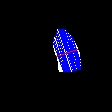

In [15]:
image = cv2.imread(path) 

height = image.shape[0]
width = image.shape[1]


# for point in weighted_avg:
#   cv2.circle(image,(int(point[0]), int(point[1])), 1, (0,255,0), -1)
  # if point[0] <50:
  #   print(point)

print(x1, y1)
print(x2, y2)
print(weighted_avg)
for i in range(len(lowerInterceptAveragePoints)): 
  # cv2.circle(image,tuple(lowerInterceptAveragePoints[i]), 1, (0,255,0), -1)
  cv2.line(image, tuple(lowerInterceptAveragePoints[i]), tuple(higherInterceptAveragePoints[i]), (255,0,0), 1)
cv2.line(image, (x1, y1), (x2, y2), (0,0,255), 1)

cv2_imshow(image)


# print(lowerInterceptAveragePoints)
# print(higherInterceptAveragePoints)
# print([x1, y1])
# print([x2, y2])

cv2.waitKey(0)
cv2.destroyAllWindows()

# Method of Disks

In [16]:
distance = getDistance([x1, y1], [x2, y2])
parallelSeperationDistance = distance/21

volume = 0

for i in range(len(lowerInterceptAveragePoints)):
  diameter = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
  radius = diameter/2
  diskVolume = math.pi * radius**2 * parallelSeperationDistance
  volume += diskVolume

print(volume)

24666.75478161623


# Prolate Ellipsoid Model (Single Ellipsoid Method)

In [17]:
long_axis_length = getDistance([x1, y1], [x2, y2])
parallelSeperationDistance = distance/21

# Manual Area Calc
area = 0

for i in range(len(lowerInterceptAveragePoints)):
  length = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
  diskArea = length * parallelSeperationDistance
  area += diskArea

volume = 0.85 * area * long_axis_length

print(volume)

15159.941991971162


# Prolate Ellipsoid Model (Biplane Area Length)

In [18]:
# Long axis Length
long_axis_length = getDistance([x1, y1], [x2, y2])

# Storing all perp lens
lengthArr = []

for i in range(len(lowerInterceptAveragePoints)):
  length = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
  lengthArr.append(length)

# 3 diff heuristics
averageLength = sum(lengthArr)/len(lengthArr)
maxLength = max(lengthArr)
midLength = lengthArr[len(lengthArr)//2]

# Volume Calc
volume = math.pi/6 * midLength**2 * long_axis_length

print(volume)

21755.09253738249


# Bullet Method


In [19]:
# Long axis Length
long_axis_length = getDistance([x1, y1], [x2, y2])

# Mid Values
midIndex = len(lengthArr)//2
midLength = getDistance(lowerInterceptAveragePoints[midIndex], higherInterceptAveragePoints[midIndex])

area = math.pi * (midLength/2)**2 

# Volume Calc
volume = 5/6 * area * long_axis_length

print(volume)

27193.865671728116


# Will become local file


[[79, 55], [79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51]]
[[55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 71], [65, 71], [66, 71], [67, 71], [68, 71], [69, 71], [70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66]

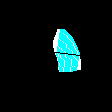

[[79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52]]
[[55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 71], [65, 71], [66, 71], [67, 71], [68, 71], [69, 71], [70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66], [80, 65]

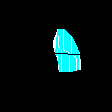

[[79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53]]
[[55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 71], [65, 71], [66, 71], [67, 71], [68, 71], [69, 71], [70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66], [80, 65], [80, 64]

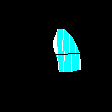

[[79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54]]
[[56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 71], [65, 71], [66, 71], [67, 71], [68, 71], [69, 71], [70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66], [80, 65], [80, 64], [80, 63]

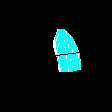

[[78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55]]
[[56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 71], [65, 71], [66, 71], [67, 71], [68, 71], [69, 71], [70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66], [80, 65], [80, 64], [80, 63], [80, 62]

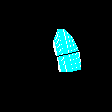

[[78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56]]
[[57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 71], [65, 71], [66, 71], [67, 71], [68, 71], [69, 71], [70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66], [80, 65], [80, 64], [80, 63], [80, 62], [80, 61]

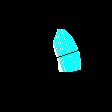

[[77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57]]
[[57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 71], [65, 71], [66, 71], [67, 71], [68, 71], [69, 71], [70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66], [80, 65], [80, 64], [80, 63], [80, 62], [80, 61], [80, 60]

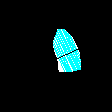

[[77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58]]
[[57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 71], [65, 71], [66, 71], [67, 71], [68, 71], [69, 71], [70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66], [80, 65], [80, 64], [80, 63], [80, 62], [80, 61], [80, 60], [80, 59]

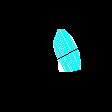

[[77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59]]
[[57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 71], [65, 71], [66, 71], [67, 71], [68, 71], [69, 71], [70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66], [80, 65], [80, 64], [80, 63], [80, 62], [80, 61], [80, 60], [80, 59], [79, 58]

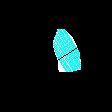

[[76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60]]
[[58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 71], [65, 71], [66, 71], [67, 71], [68, 71], [69, 71], [70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66], [80, 65], [80, 64], [80, 63], [80, 62], [80, 61], [80, 60], [80, 59], [79, 58], [79, 57]

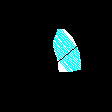

[[76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61]]
[[58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 71], [65, 71], [66, 71], [67, 71], [68, 71], [69, 71], [70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66], [80, 65], [80, 64], [80, 63], [80, 62], [80, 61], [80, 60], [80, 59], [79, 58], [79, 57], [79, 56]

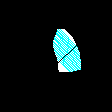

[[58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 71], [65, 71], [66, 71], [67, 71], [68, 71], [69, 71], [70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66], [80, 65], [80, 64], [80, 63], [80, 62], [80, 61], [80, 60], [80, 59], [79, 58], [79, 57], [79, 56], [79, 55], [79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45]]
[[75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52]

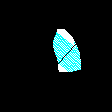

[[58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 71], [65, 71], [66, 71], [67, 71], [68, 71], [69, 71], [70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66], [80, 65], [80, 64], [80, 63], [80, 62], [80, 61], [80, 60], [80, 59], [79, 58], [79, 57], [79, 56], [79, 55], [79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44]]
[[75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53]

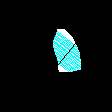

[[58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 71], [65, 71], [66, 71], [67, 71], [68, 71], [69, 71], [70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66], [80, 65], [80, 64], [80, 63], [80, 62], [80, 61], [80, 60], [80, 59], [79, 58], [79, 57], [79, 56], [79, 55], [79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43]]
[[74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54]

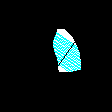

[[58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 71], [65, 71], [66, 71], [67, 71], [68, 71], [69, 71], [70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66], [80, 65], [80, 64], [80, 63], [80, 62], [80, 61], [80, 60], [80, 59], [79, 58], [79, 57], [79, 56], [79, 55], [79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42]]
[[74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55]

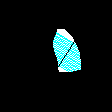

[[58, 67], [58, 68], [58, 69], [59, 70], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 71], [65, 71], [66, 71], [67, 71], [68, 71], [69, 71], [70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66], [80, 65], [80, 64], [80, 63], [80, 62], [80, 61], [80, 60], [80, 59], [79, 58], [79, 57], [79, 56], [79, 55], [79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41]]
[[73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56]

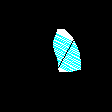

[[58, 68], [58, 69], [59, 70], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 71], [65, 71], [66, 71], [67, 71], [68, 71], [69, 71], [70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66], [80, 65], [80, 64], [80, 63], [80, 62], [80, 61], [80, 60], [80, 59], [79, 58], [79, 57], [79, 56], [79, 55], [79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40]]
[[73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57]

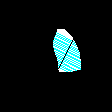

[[58, 69], [59, 70], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 71], [65, 71], [66, 71], [67, 71], [68, 71], [69, 71], [70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66], [80, 65], [80, 64], [80, 63], [80, 62], [80, 61], [80, 60], [80, 59], [79, 58], [79, 57], [79, 56], [79, 55], [79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39]]
[[72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58]

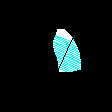

[[59, 70], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 71], [65, 71], [66, 71], [67, 71], [68, 71], [69, 71], [70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66], [80, 65], [80, 64], [80, 63], [80, 62], [80, 61], [80, 60], [80, 59], [79, 58], [79, 57], [79, 56], [79, 55], [79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38]]
[[72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59]

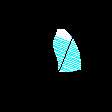

[[59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 71], [65, 71], [66, 71], [67, 71], [68, 71], [69, 71], [70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66], [80, 65], [80, 64], [80, 63], [80, 62], [80, 61], [80, 60], [80, 59], [79, 58], [79, 57], [79, 56], [79, 55], [79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37]]
[[71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60]

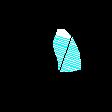

[[60, 71], [61, 71], [62, 71], [63, 71], [64, 71], [65, 71], [66, 71], [67, 71], [68, 71], [69, 71], [70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66], [80, 65], [80, 64], [80, 63], [80, 62], [80, 61], [80, 60], [80, 59], [79, 58], [79, 57], [79, 56], [79, 55], [79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36]]
[[70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61]

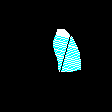

[[61, 71], [62, 71], [63, 71], [64, 71], [65, 71], [66, 71], [67, 71], [68, 71], [69, 71], [70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66], [80, 65], [80, 64], [80, 63], [80, 62], [80, 61], [80, 60], [80, 59], [79, 58], [79, 57], [79, 56], [79, 55], [79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35]]
[[69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62]

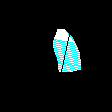

[[62, 71], [63, 71], [64, 71], [65, 71], [66, 71], [67, 71], [68, 71], [69, 71], [70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66], [80, 65], [80, 64], [80, 63], [80, 62], [80, 61], [80, 60], [80, 59], [79, 58], [79, 57], [79, 56], [79, 55], [79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34]]
[[68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63]

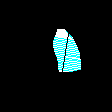

[[63, 71], [64, 71], [65, 71], [66, 71], [67, 71], [68, 71], [69, 71], [70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66], [80, 65], [80, 64], [80, 63], [80, 62], [80, 61], [80, 60], [80, 59], [79, 58], [79, 57], [79, 56], [79, 55], [79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33]]
[[67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64]

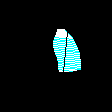

[[64, 71], [65, 71], [66, 71], [67, 71], [68, 71], [69, 71], [70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66], [80, 65], [80, 64], [80, 63], [80, 62], [80, 61], [80, 60], [80, 59], [79, 58], [79, 57], [79, 56], [79, 55], [79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32]]
[[66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65]

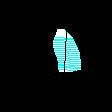

[[65, 71], [66, 71], [67, 71], [68, 71], [69, 71], [70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66], [80, 65], [80, 64], [80, 63], [80, 62], [80, 61], [80, 60], [80, 59], [79, 58], [79, 57], [79, 56], [79, 55], [79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31]]
[[65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66]

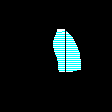

[[66, 71], [67, 71], [68, 71], [69, 71], [70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66], [80, 65], [80, 64], [80, 63], [80, 62], [80, 61], [80, 60], [80, 59], [79, 58], [79, 57], [79, 56], [79, 55], [79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30]]
[[64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67]

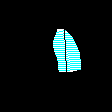

[[67, 71], [68, 71], [69, 71], [70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66], [80, 65], [80, 64], [80, 63], [80, 62], [80, 61], [80, 60], [80, 59], [79, 58], [79, 57], [79, 56], [79, 55], [79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29]]
[[63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68]

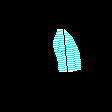

[[68, 71], [69, 71], [70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66], [80, 65], [80, 64], [80, 63], [80, 62], [80, 61], [80, 60], [80, 59], [79, 58], [79, 57], [79, 56], [79, 55], [79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29]]
[[62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69]

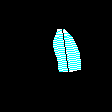

[[69, 71], [70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66], [80, 65], [80, 64], [80, 63], [80, 62], [80, 61], [80, 60], [80, 59], [79, 58], [79, 57], [79, 56], [79, 55], [79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29]]
[[61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70]

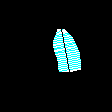

[[70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66], [80, 65], [80, 64], [80, 63], [80, 62], [80, 61], [80, 60], [80, 59], [79, 58], [79, 57], [79, 56], [79, 55], [79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29]]
[[60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71]

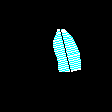

[[71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66], [80, 65], [80, 64], [80, 63], [80, 62], [80, 61], [80, 60], [80, 59], [79, 58], [79, 57], [79, 56], [79, 55], [79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29]]
[[59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71], [60, 71]

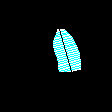

[[72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66], [80, 65], [80, 64], [80, 63], [80, 62], [80, 61], [80, 60], [80, 59], [79, 58], [79, 57], [79, 56], [79, 55], [79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29]]
[[58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71], [60, 71], [61, 71]

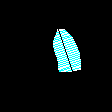

[[73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66], [80, 65], [80, 64], [80, 63], [80, 62], [80, 61], [80, 60], [80, 59], [79, 58], [79, 57], [79, 56], [79, 55], [79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29]]
[[57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71], [60, 71], [61, 71], [62, 71]

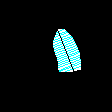

[[74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66], [80, 65], [80, 64], [80, 63], [80, 62], [80, 61], [80, 60], [80, 59], [79, 58], [79, 57], [79, 56], [79, 55], [79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29]]
[[57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71]

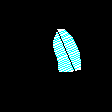

[[75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66], [80, 65], [80, 64], [80, 63], [80, 62], [80, 61], [80, 60], [80, 59], [79, 58], [79, 57], [79, 56], [79, 55], [79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30]]
[[57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 71]

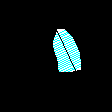

[[76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66], [80, 65], [80, 64], [80, 63], [80, 62], [80, 61], [80, 60], [80, 59], [79, 58], [79, 57], [79, 56], [79, 55], [79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31]]
[[56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 71], [65, 71]

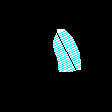

[[77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66], [80, 65], [80, 64], [80, 63], [80, 62], [80, 61], [80, 60], [80, 59], [79, 58], [79, 57], [79, 56], [79, 55], [79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32]]
[[56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 71], [65, 71], [66, 71]

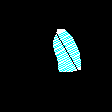

[[78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66], [80, 65], [80, 64], [80, 63], [80, 62], [80, 61], [80, 60], [80, 59], [79, 58], [79, 57], [79, 56], [79, 55], [79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33]]
[[56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 71], [65, 71], [66, 71], [67, 71]

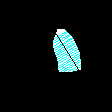

[[79, 69], [80, 69], [80, 68], [80, 67], [80, 66], [80, 65], [80, 64], [80, 63], [80, 62], [80, 61], [80, 60], [80, 59], [79, 58], [79, 57], [79, 56], [79, 55], [79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34]]
[[55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 71], [65, 71], [66, 71], [67, 71], [68, 71]

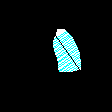

[[80, 69], [80, 68], [80, 67], [80, 66], [80, 65], [80, 64], [80, 63], [80, 62], [80, 61], [80, 60], [80, 59], [79, 58], [79, 57], [79, 56], [79, 55], [79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35]]
[[55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 71], [65, 71], [66, 71], [67, 71], [68, 71], [69, 71]

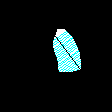

[[80, 68], [80, 67], [80, 66], [80, 65], [80, 64], [80, 63], [80, 62], [80, 61], [80, 60], [80, 59], [79, 58], [79, 57], [79, 56], [79, 55], [79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36]]
[[54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 71], [65, 71], [66, 71], [67, 71], [68, 71], [69, 71], [70, 71]

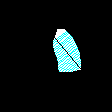

[[80, 67], [80, 66], [80, 65], [80, 64], [80, 63], [80, 62], [80, 61], [80, 60], [80, 59], [79, 58], [79, 57], [79, 56], [79, 55], [79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37]]
[[54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 71], [65, 71], [66, 71], [67, 71], [68, 71], [69, 71], [70, 71], [71, 71]

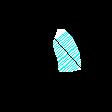

[[80, 66], [80, 65], [80, 64], [80, 63], [80, 62], [80, 61], [80, 60], [80, 59], [79, 58], [79, 57], [79, 56], [79, 55], [79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38]]
[[54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 71], [65, 71], [66, 71], [67, 71], [68, 71], [69, 71], [70, 71], [71, 71], [72, 71]

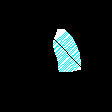

[[80, 65], [80, 64], [80, 63], [80, 62], [80, 61], [80, 60], [80, 59], [79, 58], [79, 57], [79, 56], [79, 55], [79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39]]
[[53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 71], [65, 71], [66, 71], [67, 71], [68, 71], [69, 71], [70, 71], [71, 71], [72, 71], [73, 70]

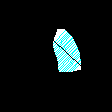

[[80, 64], [80, 63], [80, 62], [80, 61], [80, 60], [80, 59], [79, 58], [79, 57], [79, 56], [79, 55], [79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40]]
[[53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 71], [65, 71], [66, 71], [67, 71], [68, 71], [69, 71], [70, 71], [71, 71], [72, 71], [73, 70], [74, 70]

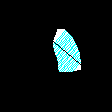

[[80, 63], [80, 62], [80, 61], [80, 60], [80, 59], [79, 58], [79, 57], [79, 56], [79, 55], [79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41]]
[[53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 71], [65, 71], [66, 71], [67, 71], [68, 71], [69, 71], [70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70]

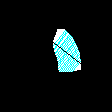

[[80, 62], [80, 61], [80, 60], [80, 59], [79, 58], [79, 57], [79, 56], [79, 55], [79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42]]
[[53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 71], [65, 71], [66, 71], [67, 71], [68, 71], [69, 71], [70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70]

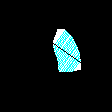

[[80, 61], [80, 60], [80, 59], [79, 58], [79, 57], [79, 56], [79, 55], [79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43]]
[[53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 71], [65, 71], [66, 71], [67, 71], [68, 71], [69, 71], [70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69]

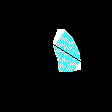

[[80, 60], [80, 59], [79, 58], [79, 57], [79, 56], [79, 55], [79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44]]
[[53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 71], [65, 71], [66, 71], [67, 71], [68, 71], [69, 71], [70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69]

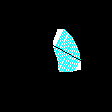

[[80, 59], [79, 58], [79, 57], [79, 56], [79, 55], [79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45]]
[[53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 71], [65, 71], [66, 71], [67, 71], [68, 71], [69, 71], [70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69]

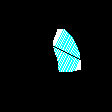

[[79, 58], [79, 57], [79, 56], [79, 55], [79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46]]
[[53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 71], [65, 71], [66, 71], [67, 71], [68, 71], [69, 71], [70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69]

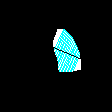

[[79, 57], [79, 56], [79, 55], [79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47]]
[[54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 71], [65, 71], [66, 71], [67, 71], [68, 71], [69, 71], [70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68]

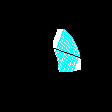

[[79, 56], [79, 55], [79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48]]
[[54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 71], [65, 71], [66, 71], [67, 71], [68, 71], [69, 71], [70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67]

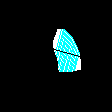

[[79, 55], [79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49]]
[[54, 50], [54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 71], [65, 71], [66, 71], [67, 71], [68, 71], [69, 71], [70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66]

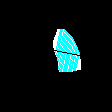

[[79, 54], [79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50]]
[[54, 51], [55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 71], [65, 71], [66, 71], [67, 71], [68, 71], [69, 71], [70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66], [80, 65]

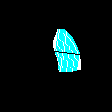

[[79, 53], [79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51]]
[[55, 52], [55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 71], [65, 71], [66, 71], [67, 71], [68, 71], [69, 71], [70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66], [80, 65], [80, 64]

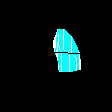

[[79, 52], [78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52]]
[[55, 53], [55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 71], [65, 71], [66, 71], [67, 71], [68, 71], [69, 71], [70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66], [80, 65], [80, 64], [80, 63]

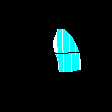

[[78, 51], [78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53]]
[[55, 54], [56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 71], [65, 71], [66, 71], [67, 71], [68, 71], [69, 71], [70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66], [80, 65], [80, 64], [80, 63], [80, 62]

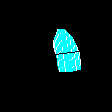

[[78, 50], [77, 49], [77, 48], [77, 47], [76, 46], [76, 45], [75, 44], [75, 43], [74, 42], [74, 41], [73, 40], [73, 39], [72, 38], [72, 37], [71, 36], [70, 35], [69, 34], [68, 33], [67, 32], [66, 31], [65, 30], [64, 29], [63, 29], [62, 29], [61, 29], [60, 29], [59, 29], [58, 29], [57, 29], [57, 30], [57, 31], [56, 32], [56, 33], [56, 34], [55, 35], [55, 36], [54, 37], [54, 38], [54, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [54, 48], [54, 49], [54, 50], [54, 51], [55, 52], [55, 53], [55, 54]]
[[56, 55], [56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 71], [65, 71], [66, 71], [67, 71], [68, 71], [69, 71], [70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66], [80, 65], [80, 64], [80, 63], [80, 62], [80, 61]

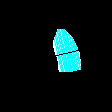

[[56, 55], [55, 54], [55, 53], [55, 52], [54, 51], [54, 50], [54, 49], [54, 48], [53, 47], [53, 46], [53, 45], [53, 44], [53, 43], [53, 42], [53, 41], [53, 40], [54, 39], [54, 38], [54, 37], [55, 36], [55, 35], [56, 34], [56, 33], [56, 32], [57, 31], [57, 30], [57, 29], [58, 29], [59, 29], [60, 29], [61, 29], [62, 29], [63, 29], [64, 29], [65, 30], [66, 31], [67, 32], [68, 33], [69, 34], [70, 35], [71, 36], [72, 37], [72, 38], [73, 39], [73, 40], [74, 41], [74, 42], [75, 43], [75, 44], [76, 45], [76, 46], [77, 47], [77, 48], [77, 49]]
[[56, 56], [57, 57], [57, 58], [57, 59], [57, 60], [58, 61], [58, 62], [58, 63], [58, 64], [58, 65], [58, 66], [58, 67], [58, 68], [58, 69], [59, 70], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 71], [65, 71], [66, 71], [67, 71], [68, 71], [69, 71], [70, 71], [71, 71], [72, 71], [73, 70], [74, 70], [75, 70], [76, 70], [77, 69], [78, 69], [79, 69], [80, 69], [80, 68], [80, 67], [80, 66], [80, 65], [80, 64], [80, 63], [80, 62], [80, 61], [80, 60]

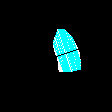

({-30: 19661.11594002839, -29: 21162.162204399337, -28: 22070.421076391514, -27: 23422.08154316419, -26: 24500.854000744013, -25: 24372.856545419767, -24: 23837.11431820524, -23: 23349.55112636313, -22: 22627.91112703295, -21: 20015.750215945678, -20: 19364.984840693694, -19: 16823.808414312036, -18: 17049.997639666013, -17: 16239.814775825891, -16: 15789.93290019294, -15: 15419.169123151862, -14: 15281.994636436815, -13: 14557.177048492646, -12: 13671.023987054517, -11: 14320.912711476527, -10: 13933.23660361055, -9: 12952.908850959313, -8: 13419.718969171523, -7: 13540.803012731967, -6: 13434.354145200066, -5: 13383.483903592865, -4: 13733.308535750108, -3: 13710.408192974219, -2: 13404.812521986385, -1: 13403.133360776897, 0: 13455.347625853077, 1: 13583.823355982144, 2: 13458.055570731782, 3: 13508.895135033135, 4: 13394.10740946639, 5: 13486.196161507121, 6: 13464.8746465432, 7: 13478.325950244767, 8: 13355.33596982384, 9: 13538.29377313447, 10: 13576.147149142955, 11: 13969.81716

In [21]:
import cv2
import numpy as np
import math
import os

# Gets all the contours for certain image
def obtainContourPoints(path):
  # read image
  img = cv2.imread(path)
  rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # set lower and upper bounds on blue color
  lower = (200,200,200)
  upper = (255,255,255)

  # threshold and invert so hexagon is white on black background
  thresh = cv2.inRange(rgb, lower, upper)

  # get contours
  result = np.zeros_like(thresh)
  contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  contours = contours[0] if len(contours) == 2 else contours[1]

  # Gets all contour points
  points = []
  for pt in contours:
      for i in pt:
        for coord in i:
          points.append(coord.tolist())
  
  return points

def getIdealPointGroup(points):
  pointGroups = []
  index = 0
  subgroup = [points[0]]

  for i in range(len(points) - 1):
    prevPoint = points[i]
    currentPoint = points[i+1]

    if (abs(int(prevPoint[0])-int(currentPoint[0])) <= 1) and (abs(int(prevPoint[1])-int(currentPoint[1])) <= 1):
      subgroup.append(currentPoint)
    else:
      pointGroups.append(subgroup[:])
      subgroup = [currentPoint]

  pointGroups.append(subgroup)

  mainPointGroup = []
  maxPointGroupSize = 0

  for group in pointGroups:
    if len(group) > maxPointGroupSize:
      maxPointGroup = group
      maxPointGroupSize = len(group)

  return maxPointGroup

# Finds points for main contour line
def getTopAndBottomCoords(points):
  # Minimum and Maximum Y Coord
  maxY = max(points, key = lambda point: point[1])
  minY = min(points, key = lambda point: point[1])

  # MinY and MaxY With the limits
  minYWith5 = minY[1] + 5
  maxYWithout5 = maxY[1] - 15

  # Creating these arrays
  minYWith5Arr = []
  maxYWithout5Arr = []

  # Finding these points
  for point in points:
    if point[1] == minYWith5:
      minYWith5Arr.append(point)
    if point[1] == maxYWithout5:
      maxYWithout5Arr.append(point)

  # Average X Coordinates
  averageTopX = round((minYWith5Arr[0][0] + minYWith5Arr[-1][0])/2)
  averageBottomX = round((maxYWithout5Arr[0][0] + maxYWithout5Arr[-1][0])/2)
  slope = getSlope([averageTopX, minYWith5], [averageBottomX, maxYWithout5])

  averageTopX -= round((minYWith5Arr[-1][0] - minYWith5Arr[0][0])/1.5/slope)
  averageBottomX += round((maxYWithout5Arr[-1][0] - maxYWithout5Arr[0][0])/3/slope)


  # Creating these arrays
  averageTopXArr = []
  averageBottomXArr = []

  # Finding these points
  condition = True
  if slope > 0:
    while condition and averageTopX <= minYWith5Arr[-1][0] and averageBottomX >= maxYWithout5Arr[0][0]:
      for point in points:
        if point[0] == averageTopX:
          averageTopXArr.append(point)
        if point[0] == averageBottomX:
          averageBottomXArr.append(point)
      if len(averageTopXArr) > 0 and len(averageBottomXArr):
        condition = False
      if len(averageTopXArr) == 0:
        averageTopX += 1
      if len(averageBottomXArr) == 0:
        averageBottomXArr -= 1
  else:
    while condition and averageTopX >= minYWith5Arr[0][0] and averageBottomX <= maxYWithout5Arr[-1][0]:
      for point in points:
        if point[0] == averageTopX:
          averageTopXArr.append(point)
        if point[0] == averageBottomX:
          averageBottomXArr.append(point)
      if len(averageTopXArr) > 0 and len(averageBottomXArr):
        condition = False
      if len(averageTopXArr) == 0:
        averageTopX -= 1
      if len(averageBottomXArr) == 0:
        averageBottomXArr += 1

  # Sorting Arrs
  averageTopXArr.sort(key=lambda point: point[1])
  averageBottomXArr.sort(key=lambda point: point[1])
  averageBottomXArr.reverse()


  # Finding Min Top and Max Botpp,
  TopCoord = averageTopXArr[0]
  BottomCoord = averageBottomXArr[0]

  x1, y1 = TopCoord
  x2, y2 = BottomCoord

  return (x1, y1, x2, y2)


# Create the 20 equally spaced points
def getWeightedAveragePoints(x1, y1, x2, y2, number):
  weighted_avg = []

  for n in range(1, number+1, 1):
    x_perpendicular = (((n*x1)+(number+1-n)*(x2))/(number+1))
    y_perpendicular = (((n*y1)+(number+1-n)*(y2))/(number+1))
    weighted_avg.append([x_perpendicular, y_perpendicular])

  for pair in weighted_avg:
    x, y = pair
    if x == int(x):
      pair[0] += 0.0001
    if y == int(y):
      pair[1] += 0.0001

  return weighted_avg

# Intercept slope
def calcExpectedIntercept(x, y, slope):
  return slope*x - y

def splitPoints(x1, y1, x2, y2, slope, points):
  p1Index = points.index([x1, y1])
  p2Index = points.index([x2, y2])

  lowerIndex = min(p1Index, p2Index)
  higherIndex = max(p1Index, p2Index)

  higherIntercept = points[lowerIndex:higherIndex]
  lowerIntercept = points[higherIndex:] + points[:lowerIndex]

  return (lowerIntercept, higherIntercept)

# Distance Between 2 Pointss
def getDistance(point1, point2):
  return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

# Slope between points 
def getSlope(point1, point2):
  if ((point1[0] == point2[0])):
    return -333
  return (point1[1] - point2[1])/(point1[0] - point2[0])

# Change to Method of Disks
def volumeMethodOfDisks(x1, y1, x2, y2, number, lowerInterceptAveragePoints, higherInterceptAveragePoints):
  # Long axis length and perp initialzation
  distance = getDistance([x1, y1], [x2, y2])
  parallelSeperationDistance = distance/(number + 1)

  # Simpson Volume Methods
  volume = 0

  for i in range(len(lowerInterceptAveragePoints)):
    diameter = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
    radius = diameter/2
    diskVolume = math.pi * radius**2 * parallelSeperationDistance
    volume += diskVolume

  return volume

# Prolate Ellipsoid Method
def volumeProlateEllipsoidMethod(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints):
  long_axis_length = getDistance([x1, y1], [x2, y2])
  parallelSeperationDistance = long_axis_length/21

  # Manual Area Calc
  area = 0

  for i in range(len(lowerInterceptAveragePoints)):
    length = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
    diskArea = length * parallelSeperationDistance
    area += diskArea

  volume = 0.85 * area * long_axis_length

  return volume

# Bullet Method Calculation
def volumeBulletMethod(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints):
  # Long axis Length
  long_axis_length = getDistance([x1, y1], [x2, y2])

  # Storing all perp lens
  lengthArr = []

  for i in range(len(lowerInterceptAveragePoints)):
    length = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
    lengthArr.append(length)

  midIndex = len(lengthArr)//2
  midLength = getDistance(lowerInterceptAveragePoints[midIndex], higherInterceptAveragePoints[midIndex])

  area = math.pi * (midLength/2)**2 

  # Volume Calc
  volume = 5/6 * area * long_axis_length

  return volume



def findCorrespondingMaskPoints(weighted_avg, lowerIntercept, higherIntercept, x1, y1, x2, y2, slope, i):
  # Calculate perpendicular slope
  try:
    perp_slope = -1/slope
  except:
    perp_slope = 10000

  # Indexing
  lowerIndex = 0
  higherIndex = 0

  # Make sure its from top to bottom direction
  if (weighted_avg[-1][0] + weighted_avg[-1][1]) < (weighted_avg[0][0] + weighted_avg[0][1]):
    weighted_avg = weighted_avg[::-1]

  # Make sure its from top to bottom direction
  if getDistance(weighted_avg[0], higherIntercept[0]) > getDistance(weighted_avg[0], higherIntercept[-1]):
      higherIntercept = higherIntercept[::-1]

  # Make sure its from top to bottom direction
  if getDistance(weighted_avg[0], lowerIntercept[0]) > getDistance(weighted_avg[0], lowerIntercept[-1]):
      lowerIntercept = lowerIntercept[::-1]

  higherInterceptAveragePoints = []
  lowerInterceptAveragePoints = []

  for averagePoint in weighted_avg:
    try:
      condition = True
      count = 0
      while condition:
        point = higherIntercept[higherIndex]
        if higherIndex == 0:
          prev_point =  [x1, y1] if getDistance(point, [x1, y1]) < getDistance(point, [x2, y2]) else [x2, y2]
          start_point = prev_point[:]
        elif higherIndex == 1:
          prev_point = higherIntercept[higherIndex-1]
        else:
          prev_point = higherIntercept[higherIndex-2]
        
        new_slope = getSlope(point, averagePoint)
        prev_slope =  getSlope(prev_point, averagePoint)
        betweenCond = ((point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0])) and abs(new_slope) > abs(slope) and abs(prev_slope) > abs(slope)
        slopeCond = (new_slope >= perp_slope and prev_slope<=perp_slope) or  (new_slope <= perp_slope and prev_slope>=perp_slope)

        if slopeCond and not betweenCond:
          higherInterceptAveragePoints.append(point)
          condition = False
        elif abs(perp_slope) >= 10 and ((new_slope > 0 and prev_slope < 0) or (new_slope < 0 and prev_slope > 0)):
          higherInterceptAveragePoints.append(point)
          condition = False
        elif count > len(higherIntercept)/2:
          higherIndex -= count
          if higherIndex == 0:
            higherInterceptAveragePoints.append(start_point)
          else:
            higherInterceptAveragePoints.append(higherIntercept[higherIndex])
          condition = False
        
        count += 1
        higherIndex += 1
    except:
      higherInterceptAveragePoints.append(higherIntercept[higherIndex - 1])

  for averagePoint in weighted_avg:
    try:
      condition = True
      count = 0
      while condition:
        point = lowerIntercept[lowerIndex]
        if lowerIndex == 0:
          prev_point = [x1, y1] if getDistance(point, [x1, y1]) < getDistance(point, [x2, y2]) else [x2, y2]
          start_point = prev_point[:]
        elif lowerIndex == 1:
          prev_point  = lowerIntercept[lowerIndex-1]
        else:
          prev_point = lowerIntercept[lowerIndex-2]

        new_slope = getSlope(point, averagePoint)
        prev_slope =  getSlope(prev_point, averagePoint)
        betweenCond = ((point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0])) and abs(new_slope) > abs(slope) and abs(prev_slope) > abs(slope)
        slopeCond = (new_slope >= perp_slope and prev_slope<=perp_slope) or  (new_slope <= perp_slope and prev_slope>=perp_slope)

        if slopeCond and not betweenCond:
          lowerInterceptAveragePoints.append(point)
          condition = False
        elif abs(perp_slope) > 10 and ((new_slope > 0 and prev_slope < 0) or (new_slope < 0 and prev_slope > 0)):
          lowerInterceptAveragePoints.append(point)
          condition = False
        elif count > len(lowerIntercept)/2:
          lowerIndex -= count
          if lowerIndex == 0:
            lowerInterceptAveragePoints.append(start_point)
          else:
            lowerInterceptAveragePoints.append(lowerIntercept[lowerIndex])
          condition = False
        
        count += 1
        lowerIndex += 1
    except:
      lowerInterceptAveragePoints.append(lowerIntercept[lowerIndex - 1])
  
  if i == 30:
      print(higherIntercept)
      print(lowerIntercept)
      print(weighted_avg)
      print(lowerInterceptAveragePoints)
      print(higherInterceptAveragePoints)
  return (lowerInterceptAveragePoints, higherInterceptAveragePoints)


def calculateVolume(path, number, method = "Method of Disks"):
  points = getIdealPointGroup(obtainContourPoints(path))

  x1, y1, x2, y2 = getTopAndBottomCoords(points)
  if (x1 + y1) > (x2 + y2):
    x1, y1, x2, y2 = x2, y2, x1, y1

  mainLineSlope = getSlope([x1, y1], [x2, y2])
  baseAngle = math.atan(mainLineSlope)

  if baseAngle>0:
      baseAngle -= math.pi
  lowerIntercept, higherIntercept = splitPoints(x1, y1, x2, y2, mainLineSlope, points)

  if (higherIntercept[0][0] + higherIntercept[0][1]) > (lowerIntercept[0][0] + lowerIntercept[0][1]):
    lowerIntercept, higherIntercept = higherIntercept, lowerIntercept

  volumes = {}
  x1s = {}
  y1s = {}
  x2s = {}
  y2s = {}
  degrees = {}

  # Volumes for all 0 to 5 cases
  for i in range(-30, 31, 1):
    x1, y1 = lowerIntercept[i]
    x2, y2 = higherIntercept[i]


    slope = getSlope([x1, y1], [x2, y2])
    angle = math.atan(slope)

    if angle>0:
      angle -= math.pi

    degrees[i] = (baseAngle - angle) * 180/math.pi


    p1Index = points.index([x1, y1])
    p2Index = points.index([x2, y2])

    lowerIndex = min(p1Index, p2Index)
    higherIndex = max(p1Index, p2Index)

    higherInterceptPoints = points[lowerIndex:higherIndex]
    lowerInterceptPoints = points[higherIndex:] + points[:lowerIndex]

    if (higherInterceptPoints[0][0] + higherInterceptPoints[0][1]) < (lowerInterceptPoints[0][0] + lowerInterceptPoints[0][1]):
      lowerInterceptPoints, higherInterceptPoints = higherInterceptPoints, lowerInterceptPoints

    weighted_avg = getWeightedAveragePoints(x1, y1, x2, y2, number)
    lowerInterceptAveragePoints, higherInterceptAveragePoints = findCorrespondingMaskPoints(weighted_avg, lowerInterceptPoints, higherInterceptPoints, x1, y1, x2, y2, slope, i)
    
    x1s[i] = [x1] + [point[0] for point in lowerInterceptAveragePoints]
    y1s[i] = [y1] + [point[1] for point in lowerInterceptAveragePoints]

    x2s[i] = [x2] + [point[0] for point in higherInterceptAveragePoints]
    y2s[i] = [y2] + [point[1] for point in higherInterceptAveragePoints]

    if i < 100:
      print(higherInterceptPoints)
      print(lowerInterceptPoints)
      print(weighted_avg)
      print(lowerInterceptAveragePoints)
      print(higherInterceptAveragePoints)

      image = cv2.imread(path) 


      # for point in points:
      #   cv2.circle(image,tuple(point), 1, (255,255,255), -1)
      #   if point[0] <50:
      #     print(point)


      # for point in weighted_avg: 
      #   cv2.circle(image,tuple((int(point[0]), int(point[1]))), 1, (0,0,0), -1)
      
      for j in range(len(lowerInterceptAveragePoints)): 
        cv2.line(image, tuple(lowerInterceptAveragePoints[j]), tuple(higherInterceptAveragePoints[j]), (255,255,0), 1)


      cv2.line(image, (x1, y1), (x2, y2), (0,0,0), 1)

      cv2_imshow(image)
      cv2.waitKey(0)
      cv2.destroyAllWindows()

    if  method == "Method of Disks":
      volumes[i] = volumeMethodOfDisks(x1, y1, x2, y2, number, lowerInterceptAveragePoints, higherInterceptAveragePoints)
    elif method == "Prolate Ellipsoid":
      volumes[i] = volumeProlateEllipsoidMethod(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints)
    elif method == "Bullet Method":
      volumes[i] = volumeBulletMethod(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints)
    
  return (volumes, x1s, y1s, x2s, y2s, degrees)

print(calculateVolume(path, 20, method = "Method of Disks"))
# print(calculateVolume("/content/output/image.png", method = "Single Ellipsoid"))
# print(calculateVolume("/content/output/image.png", method = "Biplane Area"))
# print(calculateVolume("/content/output/image.png", method = "Bullet"))